In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = (5, 3)

# Exemplo

O exemplo a seguir constrói um gráfico da Função `PPF` para uma distribuição normal.


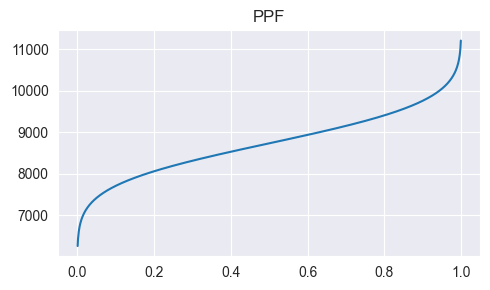

In [2]:
from scipy.stats import norm

mu = 8735
sigma = 800
prob = np.linspace(0,1,1000)

ppf = norm.ppf(prob,loc=mu,scale=sigma)

fig, ax = plt.subplots()

sns.lineplot(x=prob,y=ppf,ax=ax)
ax.set_title('PPF')

plt.tight_layout()
plt.show()

# Exercícios

E1. O salário médio de cientistas de dados no Brasil é hoje (2023) de R 8735 com um desvio padrão de R\$ 800. Considerando uma distribuição normal, faça os gráficos de PDF, CDF e PPF dessa distribuição (empregue o exemplo anterior como modelo para contruir os gráficos).

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 8735 # média
sigma = 800 # desvio padrão


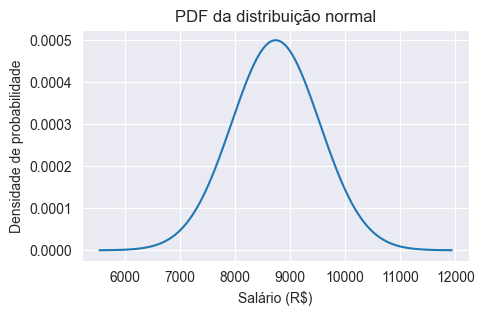

In [9]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000) # array com os valores de x
pdf = norm.pdf(x, loc=mu, scale=sigma) # array com os valores da PDF
plt.plot(x, pdf)
plt.title('PDF da distribuição normal')
plt.xlabel('Salário (R$)')
plt.ylabel('Densidade de probabilidade')
plt.show()


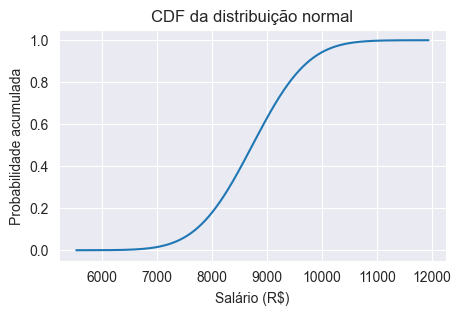

In [10]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000) # array com os valores de x
cdf = norm.cdf(x, loc=mu, scale=sigma) # array com os valores da CDF
plt.plot(x, cdf)
plt.title('CDF da distribuição normal')
plt.xlabel('Salário (R$)')
plt.ylabel('Probabilidade acumulada')
plt.show()


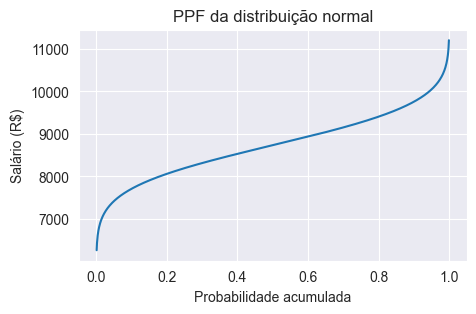

In [12]:
p = np.linspace(0.001, 0.999, 1000) # array com os valores de p
ppf = norm.ppf(p, loc=mu, scale=sigma) # array com os valores da PPF
plt.plot(p, ppf)
plt.title('PPF da distribuição normal')
plt.xlabel('Probabilidade acumulada')
plt.ylabel('Salário (R$)')
plt.show()


Q1. O salário médio de cientistas de dados no Brasil é hoje (2023) de R 8735 com um desvio padrão de R$ 800. Considerando uma distribuição normal, faça os gráficos de PDF, CDF e PPF dessa distribuição (empregue o exemplo anterior como modelo para contruir os gráficos)

In [14]:
print( 1 - norm.cdf(9500, loc=mu, scale=sigma))

0.16947297216771973


Q2. Qual o intervalo de salários em torno da média que abrange 90% dos candidatos a uma vaga de cientista de dados? Calcule empregando a função `interval()` e empregando uma das demais funções de `norm`(`pdf`, `cdf` ou `ppf`).

In [16]:
media = 8735
desvio_padrao = 800

# Usando a função interval()
intervalo = stats.norm.interval(0.9, loc=media, scale=desvio_padrao)

print(f"O intervalo de salários que abrange 90% dos candidatos é de R${intervalo[0]:.2f} a R${intervalo[1]:.2f}.")

# Usando as funções pdf e cdf
probabilidade_total = 0.9
probabilidade_abaixo = (1 - probabilidade_total) / 2
probabilidade_acima = 1 - probabilidade_abaixo

print(probabilidade_abaixo,probabilidade_acima)

limite_inferior = stats.norm.ppf(probabilidade_abaixo, loc=media, scale=desvio_padrao)
limite_superior = stats.norm.ppf(probabilidade_acima, loc=media, scale=desvio_padrao)

print(f"O intervalo de salários que abrange 90% dos candidatos é de R${limite_inferior:.2f} a R${limite_superior:.2f}.")

O intervalo de salários que abrange 90% dos candidatos é de R$7419.12 a R$10050.88.
0.04999999999999999 0.95
O intervalo de salários que abrange 90% dos candidatos é de R$7419.12 a R$10050.88.


Q3. Considere o seguinte conjunto de 10000 valores de renda do Brasil em 2023. Faça um gráfico de distribuição (PDF) e os qq-plots comparando esses dados com uma distribuição normal e uma lognormal. Empregue os valores de média e desvio padrão dessa série de dados e o parâmetro `s` $=0.954$ para a distribuição lognormal.

In [24]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/BR_income.csv')
df.head()

,income
0,4501.397086
1,3048.257175
2,3064.464535
3,2978.753179
4,3652.136710


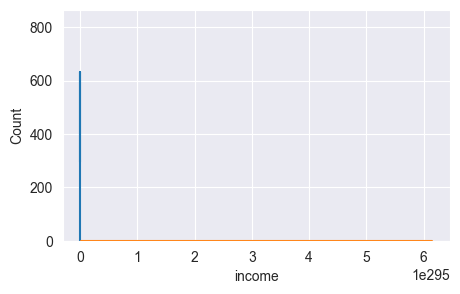

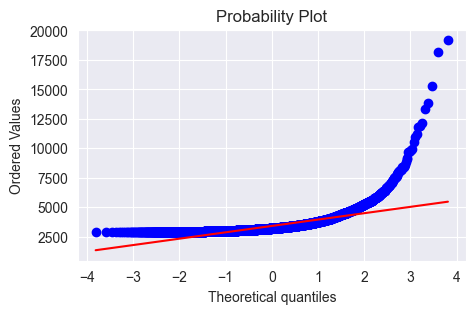

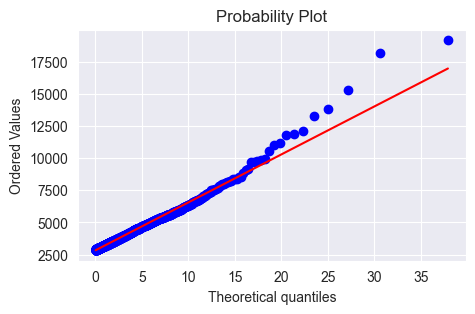

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Obtém média e desvio padrão dos dados
mu = df['income'].mean()
sigma = df['income'].std()

# Define parâmetros para a distribuição lognormal
s = 0.954

# Limita valor máximo da média
mu = np.clip(mu, None, 100)

# Cria histograma dos dados
sns.histplot(df['income'], kde=True)

# Cria curva da distribuição normal
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

# Cria curva da distribuição lognormal
shape = np.exp(mu)
scale = np.exp(s*sigma)
x = np.linspace(stats.lognorm.ppf(0.001, s, scale=scale, loc=0), stats.lognorm.ppf(0.999, s, scale=scale, loc=0), 100)
plt.plot(x, stats.lognorm.pdf(x, s, scale=scale, loc=0))

# Exibe gráfico de distribuição (PDF)
plt.show()

# Cria QQ-plot comparando os dados com a distribuição normal
fig, ax = plt.subplots()
stats.probplot(df['income'], dist="norm", plot=ax)
plt.show()

# Cria QQ-plot comparando os dados com a distribuição lognormal
fig, ax = plt.subplots()
stats.probplot(df['income'], sparams=(s,), dist="lognorm", plot=ax)
plt.show()


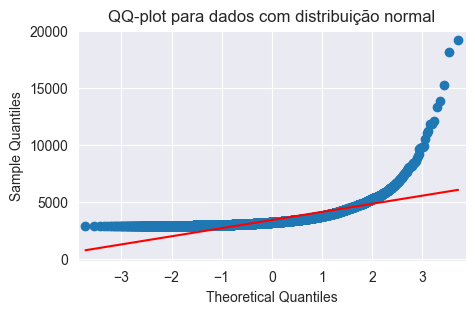

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plotando o QQ-plot para os dados
fig, ax = plt.subplots()
sm.qqplot(df['income'], line='s', ax=ax)
ax.set_title('QQ-plot para dados com distribuição normal')
plt.show()


**Atenção: Esse é um exemplo fictício e a renda do brasileiro não segue uma lognormal! Apenas vamos assumir que sim para para o exercício!**

Q4. Empregue a distribuição mais adequada que você identificou acima para saber o percentual de brasileiros que seriam beneficiados com um abono de até 3 salários mínimos (hoje, R\$ 1320).

In [61]:
import numpy as np
import pandas as pd
from scipy.stats import lognorm


# Calcula os parâmetros s e loc da distribuição lognormal
mu = np.log(df['income'].mean())
sigma = np.log(df['income'].std())
s = np.exp(sigma)
loc = 0


In [62]:
# Define o limite máximo de renda para ser beneficiado pelo abono
limite = 3 * 1320

# Calcula a probabilidade de uma pessoa com renda abaixo do limite ser beneficiada pelo abono
probabilidade = lognorm.cdf(limite, s=s, loc=loc, scale=np.exp(mu))

print(f"A probabilidade de uma pessoa com renda abaixo de R$ {limite:.2f} ser beneficiada pelo abono é de {probabilidade:.2%}")


A probabilidade de uma pessoa com renda abaixo de R$ 3960.00 ser beneficiada pelo abono é de 50.01%


Q5. Uma nova alíquota de imposto deve incidir sobre os 20% mais ricos. Qual é o valor de renda mínimo que esse novo imposto atingiria?

In [66]:
np.percentile(df['income'], 80)

3633.9875546779117

# Caso: **Penguins**

In [70]:
df = sns.load_dataset('penguins')
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Q6. Você quer aplicar um teste de hipótese para saber se o peso dos pinguins machos é significativamente diferente dos pinguins fêmea. Faça um boxplot do peso de machos e fêmeas e o gráfico de distribuição desses valores, também para machos e fêmeas. Você pode aplicar um teste de hipóteses t-student?

<Axes: xlabel='sex', ylabel='body_mass_g'>

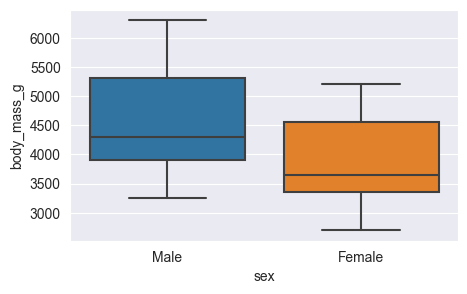

In [75]:
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind

# Filtra o dataframe para selecionar as colunas relevantes
df_penguins = df[['species', 'sex', 'body_mass_g']].dropna()

# Filtra apenas os pinguins machos e fêmeas
df_male = df_penguins[df_penguins['sex'] == 'Male']
df_female = df_penguins[df_penguins['sex'] == 'Female']

# Gera um boxplot do peso dos pinguins machos e fêmeas
sns.boxplot(x='sex', y='body_mass_g', data=df_penguins)


O valor de t-estatística é: 8.541720337994516
O valor de p-valor é: 4.897246751596224e-16


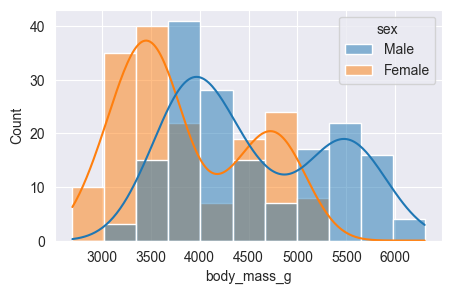

In [76]:

# Gera um gráfico de distribuição do peso dos pinguins machos e fêmeas
sns.histplot(x='body_mass_g', hue='sex', data=df_penguins, kde=True)

# Aplica o teste de hipótese t-student para comparar o peso dos pinguins machos e fêmeas
tstat, pval = ttest_ind(df_male['body_mass_g'], df_female['body_mass_g'])

print('O valor de t-estatística é:', tstat)
print('O valor de p-valor é:', pval)

 probabilidade de obter uma estatística de teste tão ou mais extrema do que a observada nos dados -> o p-valor mede a evidência contra a hipótese nula. Quanto menor o valor de p-valor, mais forte é a evidência contra a hipótese nula.

 diferença entre a média amostral e a média hipotética sob a hipótese nula, dividida pelo erro padrão da média amostral-> Quanto maior o valor absoluto da t-estatística, mais improvável é que a diferença observada seja devida ao acaso e mais forte é a evidência contra a hipótese nula.

In [85]:
print(df_male.mean(),'\n====\n',df_male.std(),'\n --- \n',df_female.mean(),'\n====\n',df_female.std())

body_mass_g    4545.684524
dtype: float64 
====
 body_mass_g    787.628884
dtype: float64 
 --- 
 body_mass_g    3862.272727
dtype: float64 
====
 body_mass_g    666.17205
dtype: float64


C:\Users\Joaov\AppData\Local\Temp\ipykernel_44864\857257962.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_male.mean(),'\n====\n',df_male.std(),'\n --- \n',df_female.mean(),'\n====\n',df_female.std())
C:\Users\Joaov\AppData\Local\Temp\ipykernel_44864\857257962.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_male.mean(),'\n====\n',df_male.std(),'\n --- \n',df_female.mean(),'\n====\n',df_female.std())
C:\Users\Joaov\AppData\Local\Temp\ipykernel_44864\857257962.py:1: FutureWarning: The default value of numer

Q7. Faça agora os mesmo gráficos, mas considerando o peso por `specie` e não por sexo. O que você conclui?

<Axes: xlabel='species', ylabel='body_mass_g'>

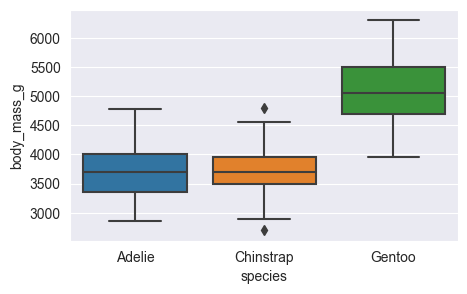

In [93]:
# Filtra o dataframe para selecionar as colunas relevantes
df_penguins = df[['species', 'sex', 'body_mass_g']].dropna()

# Filtra apenas os pinguins machos e fêmeas
df_species = df_penguins

# Gera um boxplot do peso dos pinguins machos e fêmeas
sns.boxplot(x='species', y='body_mass_g', data=df_penguins)

<Axes: xlabel='body_mass_g', ylabel='Count'>

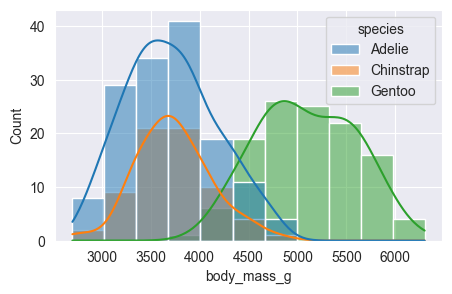

In [95]:

# Gera um gráfico de distribuição do peso dos pinguins machos e fêmeas
sns.histplot(x='body_mass_g', hue='species', data=df_species, kde=True)

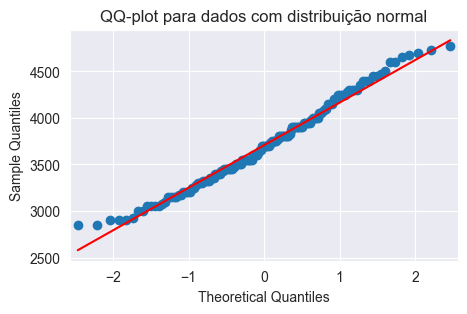

In [103]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plotando o QQ-plot para os dados
fig, ax = plt.subplots()
sm.qqplot(df_species[df_species['species']=='Adelie']['body_mass_g'], line='s', ax=ax)
ax.set_title('QQ-plot para dados com distribuição normal')
plt.show()

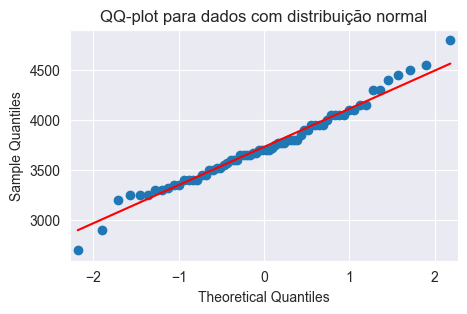

In [104]:
# Plotando o QQ-plot para os dados
fig, ax = plt.subplots()
sm.qqplot(df_species[df_species['species']=='Chinstrap']['body_mass_g'], line='s', ax=ax)
ax.set_title('QQ-plot para dados com distribuição normal')
plt.show()

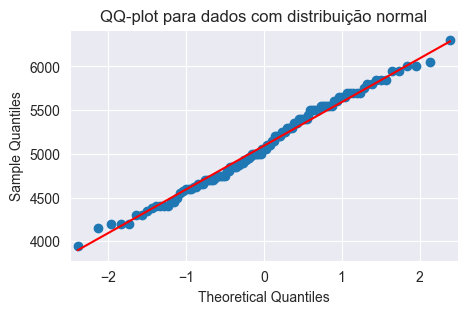

In [105]:
# Plotando o QQ-plot para os dados
fig, ax = plt.subplots()
sm.qqplot(df_species[df_species['species']=='Gentoo']['body_mass_g'], line='s', ax=ax)
ax.set_title('QQ-plot para dados com distribuição normal')
plt.show()

Q8. Você pode fazer agora um teste de hipótese para saber se o peso dos pinguins machos é significativamente diferente dos pinguins fêmea somente para espécie Chinstrap? Qual o resultado?

In [106]:
M = df_species[df_species['species']=='Chinstrap']
M = M[M['sex']=='Male']
F = df_species[df_species['species']=='Chinstrap']
F = F[F['sex']=='Female']

In [107]:
tstat, pval = ttest_ind(M['body_mass_g'], F['body_mass_g'])

print('O valor de t-estatística é:', tstat)
print('O valor de p-valor é:', pval)

O valor de t-estatística é: 5.20773384899266
O valor de p-valor é: 2.043956471470739e-06


# Caso: **`Teste A/B` Udacity, Redução de Cancelamentos pela Alteração do Site**

O Teste A/B visa comparar a efetividade de um experimento ou mudança e tem grande aplicação desde testes clínicos a avaliações de e-commerce.

Vamos verificar de modo bastante resumido o caso real do site Udacity.

**Condição Inicial.** As páginas iniciais do curso Udacity têm duas opções: "iniciar teste gratuito" e "acessar materiais do curso". Clicar em "Iniciar avaliação gratuita" solicita que o usuário insira as informações do cartão de crédito, subseqüentemente, inscrevendo-as em uma avaliação gratuita de 14 dias do curso, após o que são cobradas automaticamente. Os usuários que clicarem em "acessar materiais do curso" poderão visualizar o conteúdo do curso, mas não receberão suporte de treinamento, certificado verificado ou feedback do projeto.

**Mudança.** A Udacity testou uma mudança na qual os usuários que clicaram em "iniciar a avaliação gratuita" eram questionados sobre quanto tempo estavam dispostos a dedicar ao curso. Os usuários que escolherem 5 ou mais horas por semana serão submetidos ao processo de check-out, como de costume. Para usuários que indicam menos de 5 horas por semana, uma mensagem seria exibida indicando a necessidade de um compromisso maior de tempo para permitir o sucesso no curso e sugerindo para eles acessarem o conteúdo gratuito. Nesse ponto, o aluno teria a opção de continuar se matriculando na avaliação gratuita ou acessar os materiais do curso gratuitamente.

**Objetivo.**  Aumentar a efetividade dos alunos inscritos no teste gratuíto permitindo a empresa focar seus esforços nesses alunos.

**Desenho do Experimento.**

> **Métricas**

>> Invariant Metrics (controle): number of cookies, number of clicks, click-through-probability

>> Evaluation Metrics (objetivo): gross conversion, net conversion

In [109]:
path = 'http://meusite.mackenzie.br/rogerio/TIC/udacity_ABTesting-master/data/'
df_control = pd.read_csv(path + "Control.csv")
df_experiment = pd.read_csv(path+ "Experiment.csv")

df_control.describe()
df_experiment.describe()

df_control_notnull = df_control[pd.isnull(df_control.Enrollments) != True]
df_experiment_notnull = df_experiment[pd.isnull(df_control.Enrollments) != True]

df_SignTest = pd.merge(df_control_notnull,df_experiment_notnull,on="Date")
df_SignTest['GrossConversion_cont'] = df_SignTest.Enrollments_x/df_SignTest.Clicks_x
df_SignTest['GrossConversion_exp'] = df_SignTest.Enrollments_y/df_SignTest.Clicks_y
df_SignTest['NetConversion_cont'] = df_SignTest.Payments_x/df_SignTest.Clicks_x
df_SignTest['NetConversion_exp'] = df_SignTest.Payments_y/df_SignTest.Clicks_y

cols = ['Date','GrossConversion_cont','GrossConversion_exp','NetConversion_cont','NetConversion_exp']

df_SignTest = df_SignTest[cols]

display(df_SignTest.head())

,Date,GrossConversion_cont,GrossConversion_exp,NetConversion_cont,NetConversion_exp
0,"Sat, Oct 11",0.195051,0.153061,0.101892,0.049563
1,"Sun, Oct 12",0.188703,0.147771,0.089859,0.115924
2,"Mon, Oct 13",0.183718,0.164027,0.104510,0.089367
3,"Tue, Oct 14",0.186603,0.166868,0.125598,0.111245
4,"Wed, Oct 15",0.194743,0.168269,0.076464,0.112981


Q9. Aplique o t-test agora para as duas métricas de avaliação. Quais os resultados para essas duas métricas?

DICA: É um teste de duas amostras em que você emprega para cada métrica a variável _cont (controle) e a variável _exp (experimento)

Q10. Esses dados não estão aqui disponíveis, mas qual seria a utilidade de fazer teste nas métricas consideradas invariantes do experimento e qual o resultado desejado?

In [110]:
df= df_SignTest

In [116]:
# Filtra o dataframe para selecionar as colunas relevantes
df = df.dropna()

from scipy.stats import ttest_ind

# Calcular as diferenças entre as métricas de cada grupo
df['delta_GrossConversion'] = df['GrossConversion_exp'] - df['GrossConversion_cont']
df['delta_NetConversion'] = df['NetConversion_exp'] - df['NetConversion_cont']

# Aplicar o t-test para GrossConversion
t_statistic, p_value = ttest_ind(df['GrossConversion_exp'], df['GrossConversion_cont'])
print('GrossConversion - t-estatística: {:.3f}, p-valor: {:.3f}'.format(t_statistic, p_value))

# Aplicar o t-test para NetConversion
t_statistic, p_value = ttest_ind(df['NetConversion_exp'], df['NetConversion_cont'])
print('NetConversion - t-estatística: {:.3f}, p-valor: {:.3f}'.format(t_statistic, p_value))


GrossConversion - t-estatística: -1.540, p-valor: 0.131
NetConversion - t-estatística: -0.539, p-valor: 0.593
